# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19193375,
   'total_supply': 19193375,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 20674.0,
     'volume_24h': 30299406777,
     'market_cap': 396774405973,
     'percentage_change_1h': -0.539363777469691,
     'percentage_change_24h': -1.22602852754848,
     'percentage_change_7d': 7.65544904549852,
     'percent_change_1h': -0.539363777469691,
     'percent_change_24h': -1.22602852754848,
     'percent_change_7d': 7.65544904549852}},
   'last_updated': 1667125472}},
 'metadata': {'timestamp': 1667125472,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [4]:
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']
btc_current_price

20674.0

In [5]:
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = json.loads(eth_response.content.decode('utf-8'))
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120522144,
   'total_supply': 120522144,
   'max_supply': 120522144,
   'quotes': {'USD': {'price': 1596.87,
     'volume_24h': 14346381326,
     'market_cap': 192490703622,
     'percentage_change_1h': -1.20838718798801,
     'percentage_change_24h': -2.58857582751415,
     'percentage_change_7d': 21.5486057994701,
     'percent_change_1h': -1.20838718798801,
     'percent_change_24h': -2.58857582751415,
     'percent_change_7d': 21.5486057994701}},
   'last_updated': 1667125502}},
 'metadata': {'timestamp': 1667125502,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [6]:
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_current_price

1596.87

In [7]:
# Set current amount of crypto assets
my_btc = 1
my_eth= 1

# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1 BTC is $20674.00
The current value of your 1 ETH is $1596.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [10]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-27 04:00:00+00:00,95.21,95.6204,94.99,95.46,6874350,22018,95.420278,AGG
2022-10-27 04:00:00+00:00,383.07,385.0000,379.33,379.98,81650038,599316,381.339490,SPY


In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis='columns')
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis='columns')

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=tickers)

# Preview DataFrame
df_portfolio

AGG                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2022-10-27 04:00:00+00:00  95.21  95.6204  94.99  95.46  6874350       22018   

                                         SPY                                   \
                                vwap    open   high     low   close    volume   
timestamp                                                                       
2022-10-27 04:00:00+00:00  95.420278  383.07  385.0  379.33  379.98  81650038   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-10-27 04:00:00+00:00      599316  381.33949

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.46
Current SPY closing price: $379.98


In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 100

# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 100 SPY shares is $37998.00
The current value of your 200 AGG shares is $19092.00


### Savings Health Analysis

In [14]:
# Consolidate financial assets data
value_data = {
    "BTC": [my_btc_value],
    "ETH": [my_eth_value],
    "AGG": [my_agg_value],
    "SPY": [my_spy_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=['value'])

# Display savings DataFrame
display(df_savings)

,BTC,ETH,AGG,SPY
value,20674.0,1596.87,19092.0,37998.0


<AxesSubplot:title={'center':'Asset allocation'}, ylabel='value'>

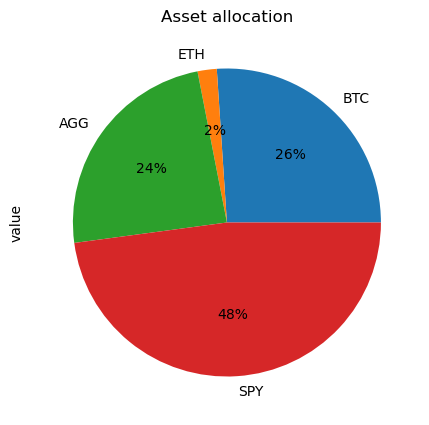

In [15]:
# Plot savings pie chart
df_savings.iloc[0].plot.pie(title='Asset allocation',autopct='%.0f%%', figsize=(5,5))

In [16]:
# Set monthly household income
monthly_income = 10000

# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savigns = df_savings.iloc[0].sum()
total_savigns


79360.87

In [17]:
# Validate saving health
if total_savigns == emergency_fund:
    print("Financial health is Borderline")
elif total_savigns < emergency_fund:
    print("Financial health is Below safety net")
elif total_savigns > emergency_fund:
    print("Financial health is in good shape")

Financial health is in good shape


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [40]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-20', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-20 04:00:00+00:00,109.32,109.4050,109.2600,109.30,2014321,9709,109.323959,AGG
2017-10-23 04:00:00+00:00,109.40,109.4700,109.3600,109.42,2024767,9208,109.404970,AGG
2017-10-24 04:00:00+00:00,109.23,109.2900,109.1700,109.19,1722478,8486,109.230095,AGG
2017-10-25 04:00:00+00:00,108.96,109.1300,108.9500,109.12,2945420,12461,109.043379,AGG
2017-10-26 04:00:00+00:00,109.20,109.2290,108.9800,109.00,2163496,8113,109.051672,AGG
...,...,...,...,...,...,...,...,...
2022-10-14 04:00:00+00:00,368.55,370.2600,356.9600,357.63,122920585,818595,361.365272,SPY
2022-10-17 04:00:00+00:00,364.01,367.9799,357.2808,366.82,92765345,609955,365.954505,SPY
2022-10-18 04:00:00+00:00,375.13,375.4500,367.5200,371.13,96898206,675916,371.126991,SPY


In [62]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis='columns')
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis='columns')

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=tickers)

# Display sample data
df_stock_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2017-10-20 04:00:00+00:00  109.32  109.405  109.26  109.30  2014321   
2017-10-23 04:00:00+00:00  109.40  109.470  109.36  109.42  2024767   
2017-10-24 04:00:00+00:00  109.23  109.290  109.17  109.19  1722478   
2017-10-25 04:00:00+00:00  108.96  109.130  108.95  109.12  2945420   
2017-10-26 04:00:00+00:00  109.20  109.229  108.98  109.00  2163496   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-10-20 04:00:00+00:00        9709  109.323959  256.70  257.14  255.7744   
2017-10-23 04:00:00+00:00        9208  109.404970  257.51  257.51  256.0200   
2017-10-24 04:00:00+00:00        8486  109.230095  256.59  256.83  256.1500   
2017-10-25 04:00:00+00:00       12461  109.043379  256.18  256.31  254.0000   
2017-10-26 04:00:00+00:00        8113  109.051672  255.99  256.30  255.4800   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-10-20 04:00:00+00:00  257.07   89178367      196614  256.766187  
2017-10-23 04:00:00+00:00  256.16   64001716      196938  256.704266  
2017-10-24 04:00:00+00:00  256.55   69886571      193871  256.490281  
2017-10-25 04:00:00+00:00  255.32  103740803      318607  255.251326  
2017-10-26 04:00:00+00:00  255.48   71854886      178431  255.755127

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

ignore = ["open","high","low","volume","trade_count", "vwap"]

for x in tickers:
    for y in ignore:
       df_stock_data.drop(columns = (x,y), inplace = True)

In [65]:
fcst_30yr = MCSimulation(portfolio_data = df_stock_data,
                      num_simulation = 10,
                      num_trading_days = 252*30
                      )

In [66]:
# Printing the simulation input data
fcst_30yr.portfolio_data.head()

AGG                  SPY             
                            close daily_return   close daily_return
timestamp                                                          
2017-10-20 04:00:00+00:00  109.30          NaN  257.07          NaN
2017-10-23 04:00:00+00:00  109.42     0.001098  256.16    -0.003540
2017-10-24 04:00:00+00:00  109.19    -0.002102  256.55     0.001522
2017-10-25 04:00:00+00:00  109.12    -0.000641  255.32    -0.004794
2017-10-26 04:00:00+00:00  109.00    -0.001100  255.48     0.000627

In [67]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
fcst_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998423,1.005007,0.993639,1.005081,0.997096,1.007644,1.001664,1.003634,1.008913,0.995144
2,1.006020,0.998962,0.986820,1.012084,1.005619,1.012724,1.017493,1.004854,1.005494,0.990024
3,1.002337,1.005457,0.989978,1.021043,1.008098,1.015112,1.008955,0.993594,1.008653,0.988378
4,1.001674,1.006576,0.994246,1.012957,1.003744,1.003343,1.009449,0.984575,1.011231,1.000146
...,...,...,...,...,...,...,...,...,...,...
7556,4.719653,1.040480,3.486151,1.920012,0.791635,3.129430,1.552671,2.272683,3.559755,4.649009
7557,4.717030,1.021810,3.535622,1.936011,0.793688,3.132022,1.545384,2.259314,3.577008,4.646063
7558,4.750008,1.027539,3.541275,1.929036,0.795536,3.157669,1.542702,2.259554,3.610057,4.616601
7559,4.782094,1.040429,3.555225,1.927856,0.792247,3.146615,1.557278,2.259632,3.644607,4.639716


<AxesSubplot:title={'center':'10 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

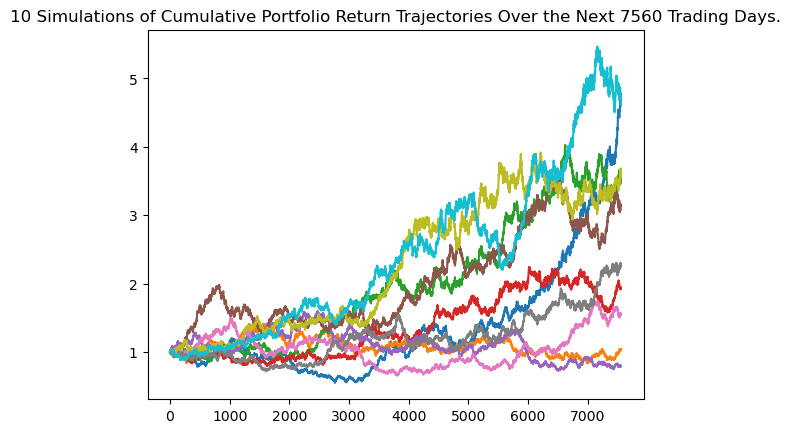

In [68]:
# Plot simulation outcomes
fcst_30yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 10 Simulations'}, ylabel='Frequency'>

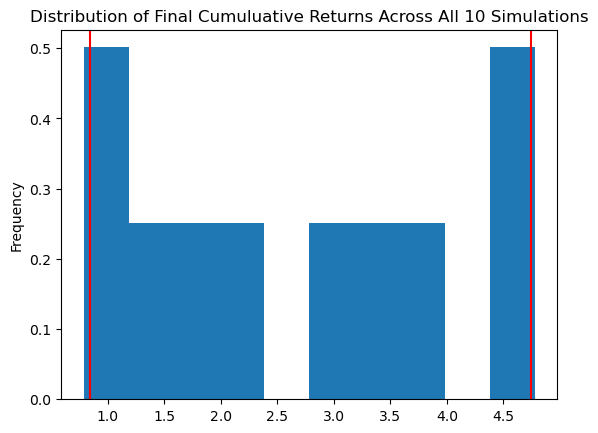

In [69]:
# Plot probability distribution and confidence intervals
fcst_30yr.plot_distribution()

### Retirement Analysis

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
# Print summary statistics
fcst_30yr_stat = fcst_30yr.summarize_cumulative_return()
fcst_30yr_stat

C:\Users\heyuh\OneDrive\Desktop\FinTech_Bootcamp\05_API\Homework\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           10.000000
mean             2.736799
std              1.429447
min              0.787967
25%              1.647039
50%              2.708034
75%              3.651854
max              4.777496
95% CI Lower     0.843352
95% CI Upper     4.740556
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [79]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = fcst_30yr_stat[8] * initial_investment 
ci_upper = fcst_30yr_stat[9]*  initial_investment 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.0f} and ${ci_upper:,.0f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16,867 and $94,811


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = fcst_30yr_stat[8] * initial_investment 
ci_upper = fcst_30yr_stat[9]*  initial_investment 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.0f} and ${ci_upper:,.0f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $25,301 and $142,217


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")